<h1>Iris Flowers Classifier</h1>

<h2>Import dependencies:</h2>

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [159]:
import warnings
warnings.filterwarnings('ignore')

<h2>Load the Data:</h2>

In [160]:
iris = datasets.load_iris()

In [161]:
data = pd.DataFrame(iris['data'],columns = iris['feature_names'])
data['Species'] = iris['target']
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [162]:
data.shape

(150, 5)

In [163]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<h2>Data Preprocessing:</h2>

<h3>Encode the Categorical data:</h3>

In [164]:
mapping ={'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [165]:
data["Species"].replace(mapping, inplace = True)
data["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

<h2>Split the Data:</h2>

In [166]:
X = data.drop(["Species"], axis=1)
Y = data["Species"]

<h3>Split The Data into train, validation and test sets using the built-in function train_test_split:</h3>

In [167]:
from sklearn.model_selection import train_test_split

# train data = 60%, validation data = 20% and, test data = 20%

X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X, Y, test_size=0.2, random_state=1)

# 25% of the train data (now 80% of the data) is 20% of the whole data
# 0.2 = val*0.8 so the val size = 0.25
X_Train2, X_Val2, Y_Train2, Y_Val2 = train_test_split(X_Train2, Y_Train2, test_size=0.25, random_state=1)

<h3 style="color: red">TODO:</h3>
<h3>Implement the Function train_validate_test_split(data, labels, testRatio = 0.3, valRatio = 0.3) from scratch</h3>

In [168]:
def train_validate_test_split(data, testRatio = 0.3, valRatio = 0.3):
    #shuffle the data to make sure the data order doesn't affect the training.
    data_shuffeled = data.sample(frac = 1)
    X_shuffeled = data_shuffeled.drop(["Species"], axis=1)
    Y_shuffeled = data_shuffeled["Species"]

    # the number of rows in the dataframe
    rows = data.shape[0]

    # Assign the train split
    # determine the size of the train data
    tain_row_num = int(rows*(1-(testRatio + valRatio)))
    X_Train = X_shuffeled.iloc[: tain_row_num]
    Y_Train = Y_shuffeled.iloc[: tain_row_num]

    # Assign the test split
    # determine the size of the test data and add the train number to take different rows.
    test_row_num = int(rows*(testRatio)) + tain_row_num
    X_Test = X_shuffeled.iloc[tain_row_num: test_row_num]
    Y_Test = Y_shuffeled.iloc[tain_row_num: test_row_num]

    # Assign the validation split
    # determine the size of the validation data and add the test number to take different rows.
    val_row_num = int(rows*(valRatio)) + test_row_num
    X_Val = X_shuffeled.iloc[test_row_num: val_row_num]
    Y_Val = Y_shuffeled.iloc[test_row_num: val_row_num]

    return X_Train, X_Val, X_Test, Y_Train, Y_Val, Y_Test

X_Train, X_Val, X_Test, Y_Train, Y_Val, Y_Test = train_validate_test_split(data, 0.2, 0.2)

<h2>Modeling:</h2>

<h3>Naive Bayes Classifier:</h3>

In [169]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_Train, Y_Train)

gnb.score(X_Train, Y_Train)

0.9555555555555556

<h3>Use the Validation set to test the model:</h3>

In [170]:
gnb.score(X_Val, Y_Val)

0.9333333333333333

<h3>Use the test set to test the model:</h3>

In [171]:
Y_Pred = gnb.predict(X_Test)

In [172]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_Test, Y_Pred)*100)

100.0


<h3 style="color: red">TODO:</h3>
<h3>Implement the Function calculate_accuracy(predicted_y, y) from scratch</h3>

In [173]:
def calculate_accuracy(Y_Pred, Y_True):
    Y_True=np.array(Y_True)
    correct=0
    for i in range(len(Y_True)):
        if Y_True[i] == Y_Pred[i]:
            correct += 1
   # returns ratio of the number of correct predictions out of all predictions that were made
    return correct / float(len(Y_True)) * 100.0

In [174]:
#test the accuracy
accuracy = calculate_accuracy(Y_Pred,Y_Test)
print(accuracy)

100.0


<h3>Predict a Single instant: </h3>

In [175]:
# the true value should be 'Iris-setosa'
single_pred = gnb.predict(np.array([[5.1, 3.5, 1.4, 0.2],]))[0]

print(list(mapping.keys())[list(mapping.values()).index(single_pred)])

Iris-setosa


<h3 style="color: red">TODO:</h3>
<h3>Draw the Decision boundaries</h3>

<h4>Use PCA to reduce the dimension of the data to 2D:</h4>

In [176]:
X_Plot_Train = X_Train[["sepal length (cm)","sepal width (cm)"]]

In [177]:
gnb_plot = GaussianNB()
gnb_plot.fit(X_Plot_Train, Y_Train)

gnb_plot.score(X_Plot_Train, Y_Train)

0.7888888888888889

<AxesSubplot:>

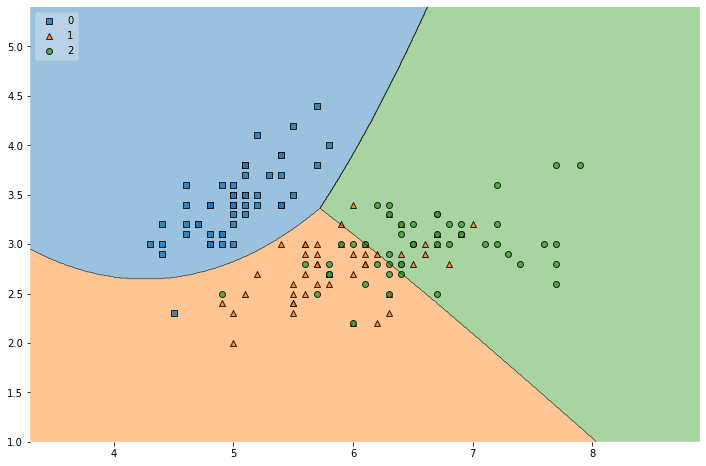

In [178]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12, 8))
plot_decision_regions(np.array( X[["sepal length (cm)","sepal width (cm)"]]), np.array(Y), clf=gnb_plot, legend=2)


<h3>Use PCA to reduce the dimention of the data to 2D:</h3>

In [179]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_Plot = X_Train

X_Plot = pca.fit_transform(X_Plot)

In [180]:
gnb_plot_pca = GaussianNB()
gnb_plot_pca.fit(X_Plot, Y_Train)

gnb_plot_pca.score(X_Plot, Y_Train)

0.9333333333333333

In [181]:
# Reduce the dimension of all the data to plot it
X = pca.fit_transform(X)

<AxesSubplot:>

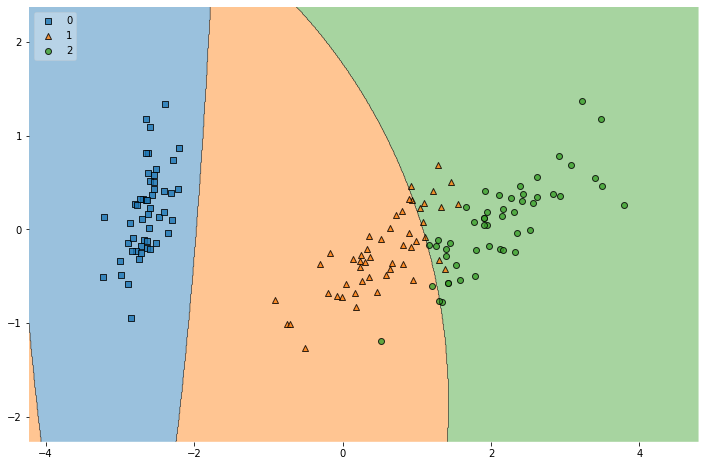

In [182]:
plt.figure(figsize=(12, 8))
plot_decision_regions(np.array(X), np.array(Y), clf=gnb_plot_pca, legend=2)

<h3>data 3D Plotting using Plotly</h3>

In [183]:
from plotly.express import scatter_3d

scatter_3d(data, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)', size="petal width (cm)",
                   color="Species", color_discrete_map={"Joly": "blue", "Bergeron": "violet", "Coderre": "pink"})\
            .show()